In [1]:
import os
import sys
import random
module_path = os.path.abspath(os.path.join('./code'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import readlist_revised as rl

In [3]:
def generate_file(filename, num_steps, width_contig, 
                  gap_size, num_delta, num_overlaps, 
                  start_variance, end_variance):
    outfile = open(filename, "w")
    for i in range(num_steps):
        for j in range(num_overlaps):
            start_shift = int(random.random()*start_variance)
            end_shift = int(random.random()*end_variance)
            outfile.write("{}\t{}\n".format(
                i*width_contig+num_delta*j+i*gap_size+start_shift,
                (i+1)*width_contig+num_delta*j+i*gap_size+start_shift+end_shift))
    outfile.close()
    return

In [4]:
def generate_file_to_end(filename, end_coord, width_contig, 
                  gap_size, num_delta, num_overlaps, 
                  start_variance, end_variance):
    outfile = open(filename, "w")
    i = 0
    keep_going = True
    while keep_going:
        for j in range(num_overlaps):
            start_shift = int(random.random()*start_variance)
            end_shift = int(random.random()*end_variance)
            start = i*width_contig+num_delta*j+i*gap_size+start_shift
            end = (i+1)*width_contig+num_delta*j+i*gap_size+start_shift+end_shift
            if end > end_coord:
                keep_going = False
                break
            outfile.write("{}\t{}\n".format(start,end))
        i += 1
    outfile.close()
    return

In [5]:
generate_file_to_end("test1.txt", 3000, 10, -3, 1, 2,0,9)
generate_file_to_end("test2.txt", 3000, 60, 160, 1, 2,20,15)

In [6]:
infile = open("test1.txt", "r")
L = infile.readlines()
infile.close()

In [7]:
print(sys.getsizeof(L))

7552


In [8]:
R1 = rl.ReadList("test1.txt", 0, 1)
R2 = rl.ReadList("test2.txt", 0, 1)

Opened test1.txt
Opened test2.txt


In [9]:
print(sys.getsizeof(R1.L))

64


In [10]:
def size_list_and_elements(L):
    sizesum = sys.getsizeof(L)
    for item in L:
        sizesum += sys.getsizeof(item)
    return sizesum

In [11]:
size_list_and_elements(R1.L)

64

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [13]:
def plotline(line, height, plot, color=""):
    tup1 = line[0], line[1]
    tup2 = height, height
    if color:
        plot.plot(tup1, tup2, color)
    else:
        plot.plot(tup1, tup2)

In [14]:
def plot_overlaps(R1,R2, upper, lower):
    plt.figure(figsize=(10,1))
    plt.grid()
    i = 0
    for line in R1:
        plotline(line, i, plt, color="b")
        i = (i + 1) % upper
    i = 0
    for line in R2:
        plotline(line, -(i+1), plt, color="r")
        i = (i + 1) % lower
    plt.show()

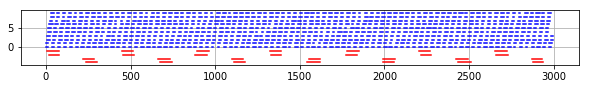

In [15]:
plot_overlaps(R1, R2, 10, 4)

In [16]:
A = rl.Aligner("test1.txt", 0, 1, "test2.txt", 0, 1, "OUT_A.txt")
B = rl.Aligner("test1.txt", 0, 1, "test2.txt", 0, 1, "OUT_B.txt")

Opened test1.txt
Opened test2.txt
Opened OUT_A.txt
Opened test1.txt
Opened test2.txt
Opened OUT_B.txt


In [17]:
#B will be the naive runner
B.overload()

In [18]:
#cProfile.run('A = rl.Aligner("test1.txt","test2.txt","OUT.txt"); A.run()')

In [19]:
A.run_with_space_analysis("log_A.txt")
B.run_with_space_analysis("log_B.txt")

Closed test1.txt
Closed test2.txt
Closed OUT_A.txt
Closed test1.txt
Closed test2.txt
Closed OUT_B.txt


643

In [20]:
import numpy as np

In [21]:
sizes_A = np.sum(np.genfromtxt("log_A.txt"), axis = 1)

In [22]:
sizes_B = np.sum(np.genfromtxt("log_B.txt"), axis = 1)

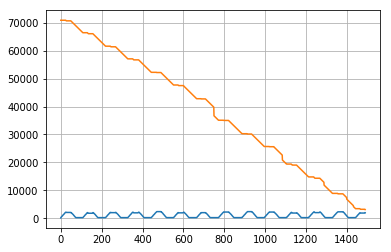

In [23]:
plt.figure()
plt.plot(range(len(sizes_A)),sizes_A)
plt.plot(range(len(sizes_B)),sizes_B)
plt.grid()
plt.show()

In [24]:
def run_and_graph_on_test_files(file1, col11, col12, file2, col21, col22, 
                                out_A, out_B, log_A, log_B, plot_A=True, plot_B=True):
    
    A = rl.Aligner(file1, col11, col12, file2, col21, col22, out_A)
    B = rl.Aligner(file1, col11, col12, file2, col21, col22, out_B)
    
    B.overload()
    
    aligns = A.run_with_space_analysis(log_A)
    B.run_with_space_analysis(log_B)
    
    sizes_A = np.sum(np.genfromtxt(log_A), axis = 1)
    sizes_B = np.sum(np.genfromtxt(log_B), axis = 1)
    
    plt.figure()
    
    length_A = len(sizes_A)
    length_B = len(sizes_B)
    desired_length = 100
    step_size_A = length_A//desired_length
    step_size_B = length_B//desired_length
    if not step_size_A:
        step_size_A = 1
    if not step_size_B:
        step_size_B = 1    
    
    plot_view_A = sizes_A[::step_size_A]
    plot_view_B = sizes_B[::step_size_B]
    
    range_A = range(len(plot_view_A))
    range_B = range(len(plot_view_B))
    
    if plot_A:
        plt.plot(range_A,plot_view_A)
    if plot_B:
        plt.plot(range_B,plot_view_B)
    plt.yticks([0])
    plt.xticks([])
    plt.grid()
    plt.show()
        
    return sizes_A.mean(), sizes_A.max(), sizes_B.mean(), sizes_B.max()
                    

Opened test1.txt
Opened test2.txt
Opened outa.txt
Opened test1.txt
Opened test2.txt
Opened outb.txt
Closed test1.txt
Closed test2.txt
Closed outa.txt
Closed test1.txt
Closed test2.txt
Closed outb.txt


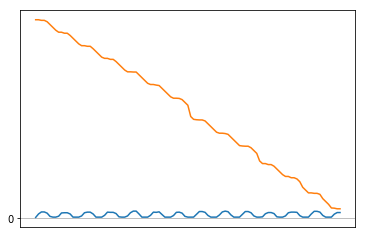

Closed outa.txt
Closed outb.txt


(1121.8081824279006, 2384.0, 38183.034205231386, 70904.0)

In [25]:
run_and_graph_on_test_files("test1.txt", 0, 1,
                            "test2.txt", 0, 1,
                            "outa.txt",
                            "outb.txt",
                            "loga.txt",
                            "logb.txt")

In [26]:
def analyze(length, tag):
    generate_file_to_end("test1_{}.txt".format(tag), 30*length, 10, -3, 1, 2,0,9)
    generate_file_to_end("test2_{}.txt".format(tag), 30*length, 60, 160, 1, 2,20,15)
    return run_and_graph_on_test_files("test1_{}.txt".format(tag),0,1,
                                "test2_{}.txt".format(tag),0,1,
                                "outa_{}.txt".format(tag),
                                "outb_{}.txt".format(tag),
                                "loga_{}.txt".format(tag),
                                "logb_{}.txt".format(tag))

In [27]:
def plot_overlap_single(R1,R2, title):
    plt.figure(figsize=(4,1))
    plt.grid()
    i = 0
    for line in R1:
        plotline(line, i, plt, color="b")
        i = (i + 1) % 10
    i = 0
    for line in R2:
        plotline(line, -(i+1), plt, color="r")
        i = (i + 1) % 4
    plt.ylim(-3,3)
    plt.title(title)
    plt.yticks([])
    plt.xticks([])
    plt.show()

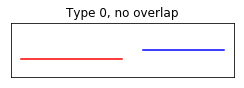

In [28]:
plot_overlap_single([(18,30)], [(0,15)], "Type 0, no overlap")

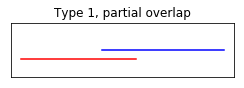

In [29]:
plot_overlap_single([(12,30)], [(0,17)], "Type 1, partial overlap")

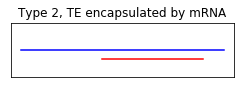

In [30]:
plot_overlap_single([(0,30)], [(12,27)], "Type 2, TE encapsulated by mRNA")

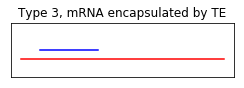

In [31]:
plot_overlap_single([(5,11)], [(3,24)], "Type 3, mRNA encapsulated by TE")

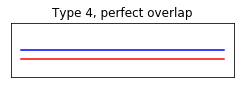

In [32]:
plot_overlap_single([(6,21)], [(6,21)], "Type 4, perfect overlap")

In [33]:
def plot_overlap_single_vertical(R1,R2, vert, lim, title):
    plt.figure(figsize=(4,1))
    plt.grid()
    i = 0
    for line in R1:
        plotline(line, i, plt, color="b")
        i = (i + 1) % 10
    i = 0
    for line in R2:
        plotline(line, -(i+1), plt, color=line[2])
        i = (i + 1) % 4
    for v in vert:
        plt.plot((vert,vert),lim, color = "c")
    plt.title(title)
    plt.ylim(lim[0],lim[1])
    plt.yticks([])
    plt.xticks([])
    plt.show()

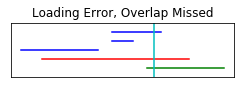

In [34]:
plot_overlap_single_vertical([(0,11),(13,16),(13,20)], 
                    [(3,24,"r"),(18,29,"g")], [19], (-3,3),
                    "Loading Error, Overlap Missed")

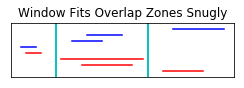

In [35]:
plot_overlap_single_vertical([(0,3),(10,16),(13,20), (30,40)], 
                    [(1,4,"r"),(8,24,"r"), (12,22,"r"), (28,36,"r")], [7,25], (-5,4),
                    "Window Fits Overlap Zones Snugly")

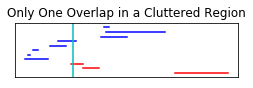

In [36]:
plot_overlap_single_vertical([(0,9), (1,2),(3,5),(10,16),(13,20), (30,40), (32,55), (31,33)], 
                    [(18,23,"r"),(23,29,"r"),(59,80,"r")], [19], (-4,8),
                    "Only One Overlap in a Cluttered Region")

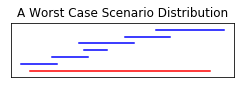

In [37]:
plot_overlap_single_vertical([(0,8),(7,15),(14,19),(13,25),(23,33),(30,45)], 
                    [(2,42,"r")], [], (-2,6),
                    "A Worst Case Scenario Distribution")

In [38]:
R3 = rl.ReadList("B73V4_ctg210.rna", 8, 9)
R4 = rl.ReadList("B73V4_ctg210.te", 3, 4)

Opened B73V4_ctg210.rna
Opened B73V4_ctg210.te


Opened B73V4_ctg210.rna
Opened B73V4_ctg210.te
Opened outa.txt
Opened B73V4_ctg210.rna
Opened B73V4_ctg210.te
Opened outb.txt
Closed B73V4_ctg210.rna
Closed B73V4_ctg210.te
Closed outa.txt
Closed B73V4_ctg210.rna
Closed B73V4_ctg210.te
Closed outb.txt


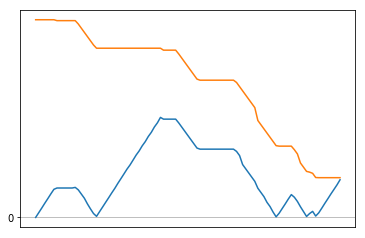

Closed outa.txt
Closed outb.txt


(162436.75291446535, 393776.0, 531814.74496790813, 776880.0)

In [39]:
run_and_graph_on_test_files("B73V4_ctg210.rna",8,9,
                            "B73V4_ctg210.te",3,4,
                            "outa.txt",
                            "outb.txt",
                            "loga.txt",
                            "logb.txt",
                            True, True)

Opened test1_10.txt
Opened test2_10.txt
Opened outa_10.txt
Opened test1_10.txt
Opened test2_10.txt
Opened outb_10.txt
Closed test1_10.txt
Closed test2_10.txt
Closed outa_10.txt
Closed test1_10.txt
Closed test2_10.txt
Closed outb_10.txt


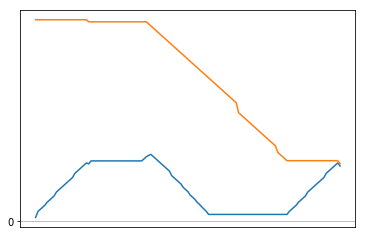

Closed outa_10.txt
Closed outb_10.txt


(1145.4436090225563, 2312.0, 5016.4210526315792, 6984.0)

In [40]:
analyze(10,"10")

Opened test1_100.txt
Opened test2_100.txt
Opened outa_100.txt
Opened test1_100.txt
Opened test2_100.txt
Opened outb_100.txt
Closed test1_100.txt
Closed test2_100.txt
Closed outa_100.txt
Closed test1_100.txt
Closed test2_100.txt
Closed outb_100.txt


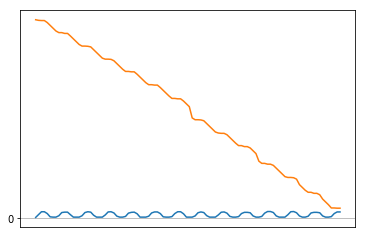

Closed outa_100.txt
Closed outb_100.txt


(1098.6901694915255, 2384.0, 38074.869152542371, 70904.0)

In [41]:
analyze(100,"100")

Opened test1_1000.txt
Opened test2_1000.txt
Opened outa_1000.txt
Opened test1_1000.txt
Opened test2_1000.txt
Opened outb_1000.txt
Closed test1_1000.txt
Closed test2_1000.txt
Closed outa_1000.txt
Closed test1_1000.txt
Closed test2_1000.txt
Closed outb_1000.txt


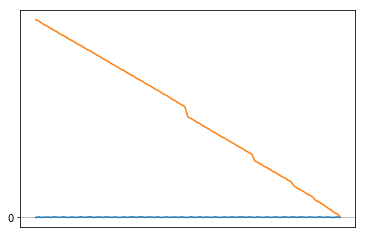

Closed outa_1000.txt
Closed outb_1000.txt


(1100.0355767954334, 2456.0, 367466.70171246515, 708320.0)

In [42]:
analyze(1000,"1000")

Opened B73V4_ctg199.rna
Opened B73V4_ctg199.te
Opened outa.txt
Opened B73V4_ctg199.rna
Opened B73V4_ctg199.te
Opened outb.txt
Closed B73V4_ctg199.rna
Closed B73V4_ctg199.te
Closed outa.txt
Closed B73V4_ctg199.rna
Closed B73V4_ctg199.te
Closed outb.txt


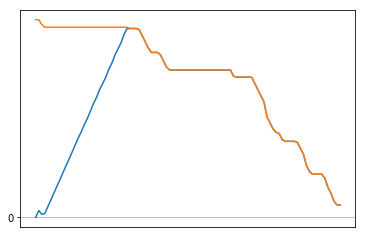

Closed outa.txt
Closed outb.txt


(678738.24834713887, 1177296.0, 871451.58841857279, 1224048.0)

In [43]:
run_and_graph_on_test_files("B73V4_ctg199.rna",8,9,
                            "B73V4_ctg199.te",3,4,
                            "outa.txt",
                            "outb.txt",
                            "loga.txt",
                            "logb.txt",
                            True, True)

Opened B73V4_ctg121.rna
Opened B73V4_ctg121.te
Opened outa.txt
Opened B73V4_ctg121.rna
Opened B73V4_ctg121.te
Opened outb.txt
Closed B73V4_ctg121.rna
Closed B73V4_ctg121.te
Closed outa.txt
Closed B73V4_ctg121.rna
Closed B73V4_ctg121.te
Closed outb.txt


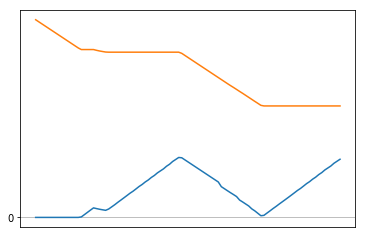

Closed outa.txt
Closed outb.txt


(279173.70599095942, 681832.0, 1647492.0303049595, 2216736.0)

In [44]:
run_and_graph_on_test_files("B73V4_ctg121.rna",8,9,
                            "B73V4_ctg121.te",3,4,
                            "outa.txt",
                            "outb.txt",
                            "loga.txt",
                            "logb.txt",
                            True, True)

Opened B73V4_ctg93.rna
Opened B73V4_ctg93.te
Opened outa.txt
Opened B73V4_ctg93.rna
Opened B73V4_ctg93.te
Opened outb.txt
Closed B73V4_ctg93.rna
Closed B73V4_ctg93.te
Closed outa.txt
Closed B73V4_ctg93.rna
Closed B73V4_ctg93.te
Closed outb.txt


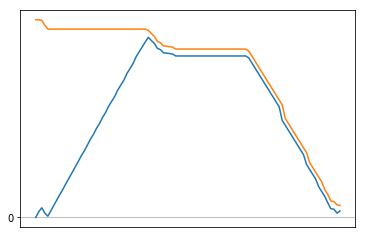

Closed outa.txt
Closed outb.txt


(295091.34185303515, 498616.0, 416039.54462193826, 543720.0)

In [45]:
run_and_graph_on_test_files("B73V4_ctg93.rna",8,9,
                            "B73V4_ctg93.te",3,4,
                            "outa.txt",
                            "outb.txt",
                            "loga.txt",
                            "logb.txt",
                            True, True)

Opened B73V4_ctg210.te
Opened B73V4_ctg210.rna
Opened outa.txt
Opened B73V4_ctg210.te
Opened B73V4_ctg210.rna
Opened outb.txt
Closed B73V4_ctg210.te
Closed B73V4_ctg210.rna
Closed outa.txt
Closed B73V4_ctg210.te
Closed B73V4_ctg210.rna
Closed outb.txt


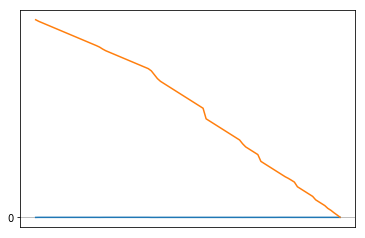

Closed outa.txt
Closed outb.txt


(370.11399752593013, 480.0, 431820.58235797886, 776880.0)

In [46]:
run_and_graph_on_test_files("B73V4_ctg210.te",3,4,
                            "B73V4_ctg210.rna",8,9,
                            "outa.txt",
                            "outb.txt",
                            "loga.txt",
                            "logb.txt",
                            True, True)

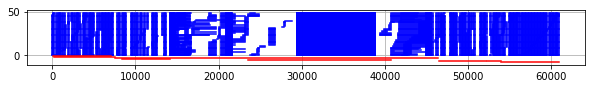

In [47]:
plot_overlaps(R3,R4, 50, 50)

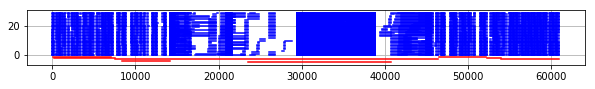

In [48]:
plot_overlaps(R3,R4, 30, 5)

Opened test1.txt
Opened test2.txt
Opened outa.txt
Opened test1.txt
Opened test2.txt
Opened outb.txt
Closed test1.txt
Closed test2.txt
Closed outa.txt
Closed test1.txt
Closed test2.txt
Closed outb.txt


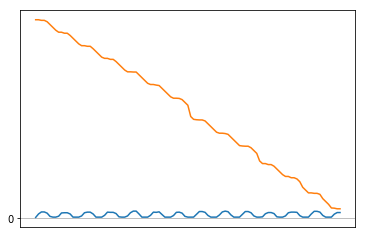

Closed outa.txt
Closed outb.txt


(1121.8081824279006, 2384.0, 38183.034205231386, 70904.0)

In [49]:
run_and_graph_on_test_files("test1.txt",0,1,
                            "test2.txt",0,1,
                            "outa.txt",
                            "outb.txt",
                            "loga.txt",
                            "logb.txt",
                            True, True)

Opened test2.txt
Opened test1.txt
Opened outa.txt
Opened test2.txt
Opened test1.txt
Opened outb.txt
Closed test2.txt
Closed test1.txt
Closed outa.txt
Closed test2.txt
Closed test1.txt
Closed outb.txt


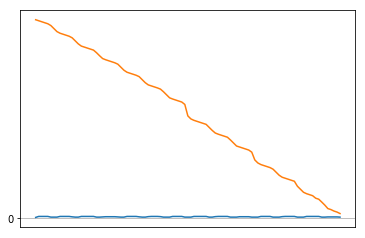

Closed outa.txt
Closed outb.txt


(362.67197875166005, 480.0, 37328.568393094291, 70904.0)

In [50]:
run_and_graph_on_test_files("test2.txt",0,1,
                            "test1.txt",0,1,
                            "outa.txt",
                            "outb.txt",
                            "loga.txt",
                            "logb.txt",
                            True, True)

Opened B73V4_ctg93.te
Opened B73V4_ctg93.rna
Opened outa.txt
Opened B73V4_ctg93.te
Opened B73V4_ctg93.rna
Opened outb.txt
Closed B73V4_ctg93.te
Closed B73V4_ctg93.rna
Closed outa.txt
Closed B73V4_ctg93.te
Closed B73V4_ctg93.rna
Closed outb.txt


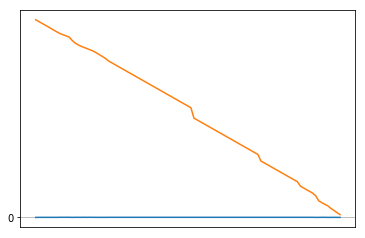

Closed outa.txt
Closed outb.txt


(355.16359237980043, 480.0, 288955.05473238585, 543720.0)

In [51]:
run_and_graph_on_test_files("B73V4_ctg93.te",3,4,
                            "B73V4_ctg93.rna",8,9,
                            "outa.txt",
                            "outb.txt",
                            "loga.txt",
                            "logb.txt",
                            True, True)

Opened B73V4_ctg121.te
Opened B73V4_ctg121.rna
Opened outa.txt
Opened B73V4_ctg121.te
Opened B73V4_ctg121.rna
Opened outb.txt
Closed B73V4_ctg121.te
Closed B73V4_ctg121.rna
Closed outa.txt
Closed B73V4_ctg121.te
Closed B73V4_ctg121.rna
Closed outb.txt


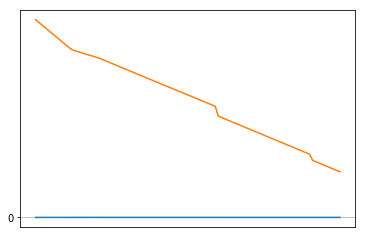

Closed outa.txt
Closed outb.txt


(320.00566171266809, 480.0, 1332274.1955312912, 2216736.0)

In [52]:
run_and_graph_on_test_files("B73V4_ctg121.te",3,4,
                            "B73V4_ctg121.rna",8,9,
                            "outa.txt",
                            "outb.txt",
                            "loga.txt",
                            "logb.txt",
                            True, True)